In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df1 = df.copy()

In [7]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [8]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null


In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [10]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')


In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.shape

(302, 14)

In [14]:
print(df.columns)

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')


In [15]:
for i in df.columns:
    print(f'{i}-{df[i].nunique()}')

age-41
gender-2
chest_pain-4
rest_bps-49
cholestrol-152
fasting_blood_sugar-2
rest_ecg-3
thalach-91
exer_angina-2
old_peak-40
slope-3
ca-5
thalassemia-4
target-2


In [16]:
cat_cols=['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']
cont_cols=['age','rest_bps','cholestrol','thalach','old_peak']

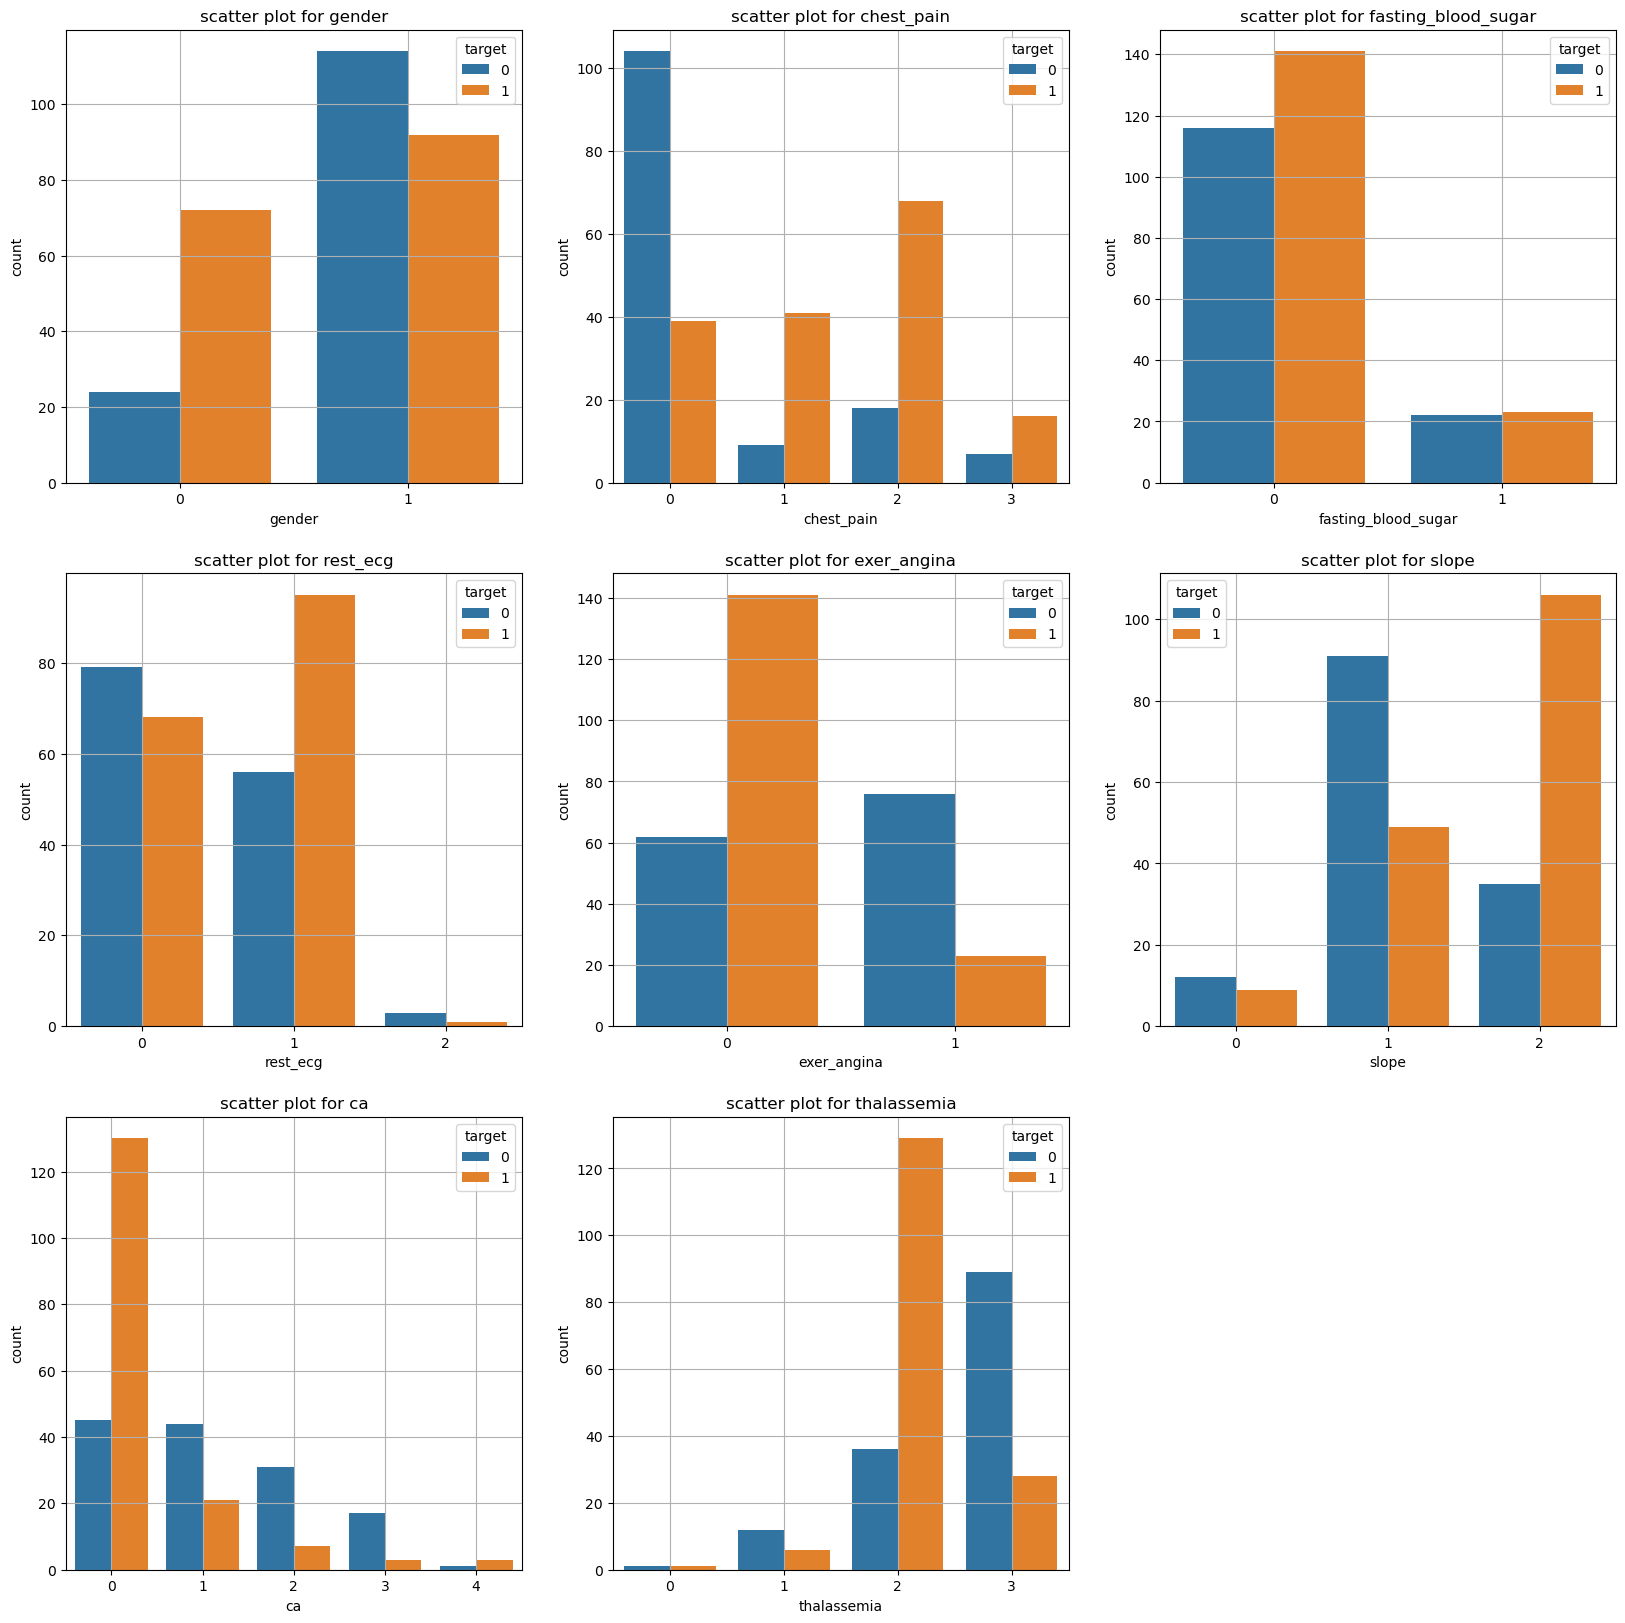

In [17]:
# cols_pairplot = ['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
#        'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
#        'slope', 'ca', 'thalassemia', 'target'],

plt.figure(figsize=(20,20))
for i in range(0,len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cat_cols[i]],hue=df['target'])
    plt.title(f'scatter plot for {cat_cols[i]}')
    plt.grid()
plt.show()




In [20]:
df['Age_bins']=pd.cut(df['age'],bins=list(range(25,85,5)))
df['Age_bins'].value_counts()

(55, 60]    72
(50, 55]    57
(60, 65]    46
(40, 45]    45
(45, 50]    31
(65, 70]    27
(35, 40]    11
(30, 35]     6
(70, 75]     4
(75, 80]     2
(25, 30]     1
Name: Age_bins, dtype: int64

In [22]:
pt1=pd.pivot_table(data=df,columns=['target'],index=['Age_bins'],values=['cholestrol'])

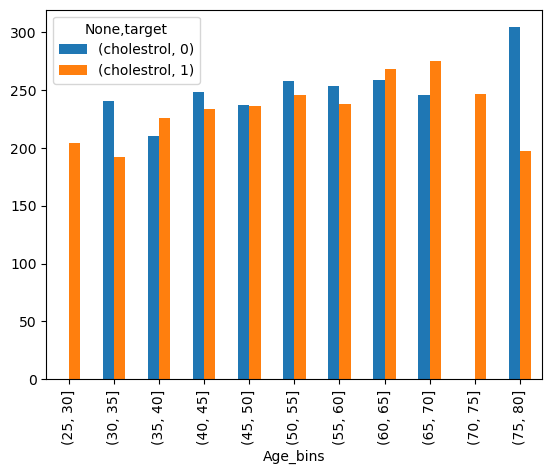

In [26]:
pt1.plot(kind='bar')
plt.show()

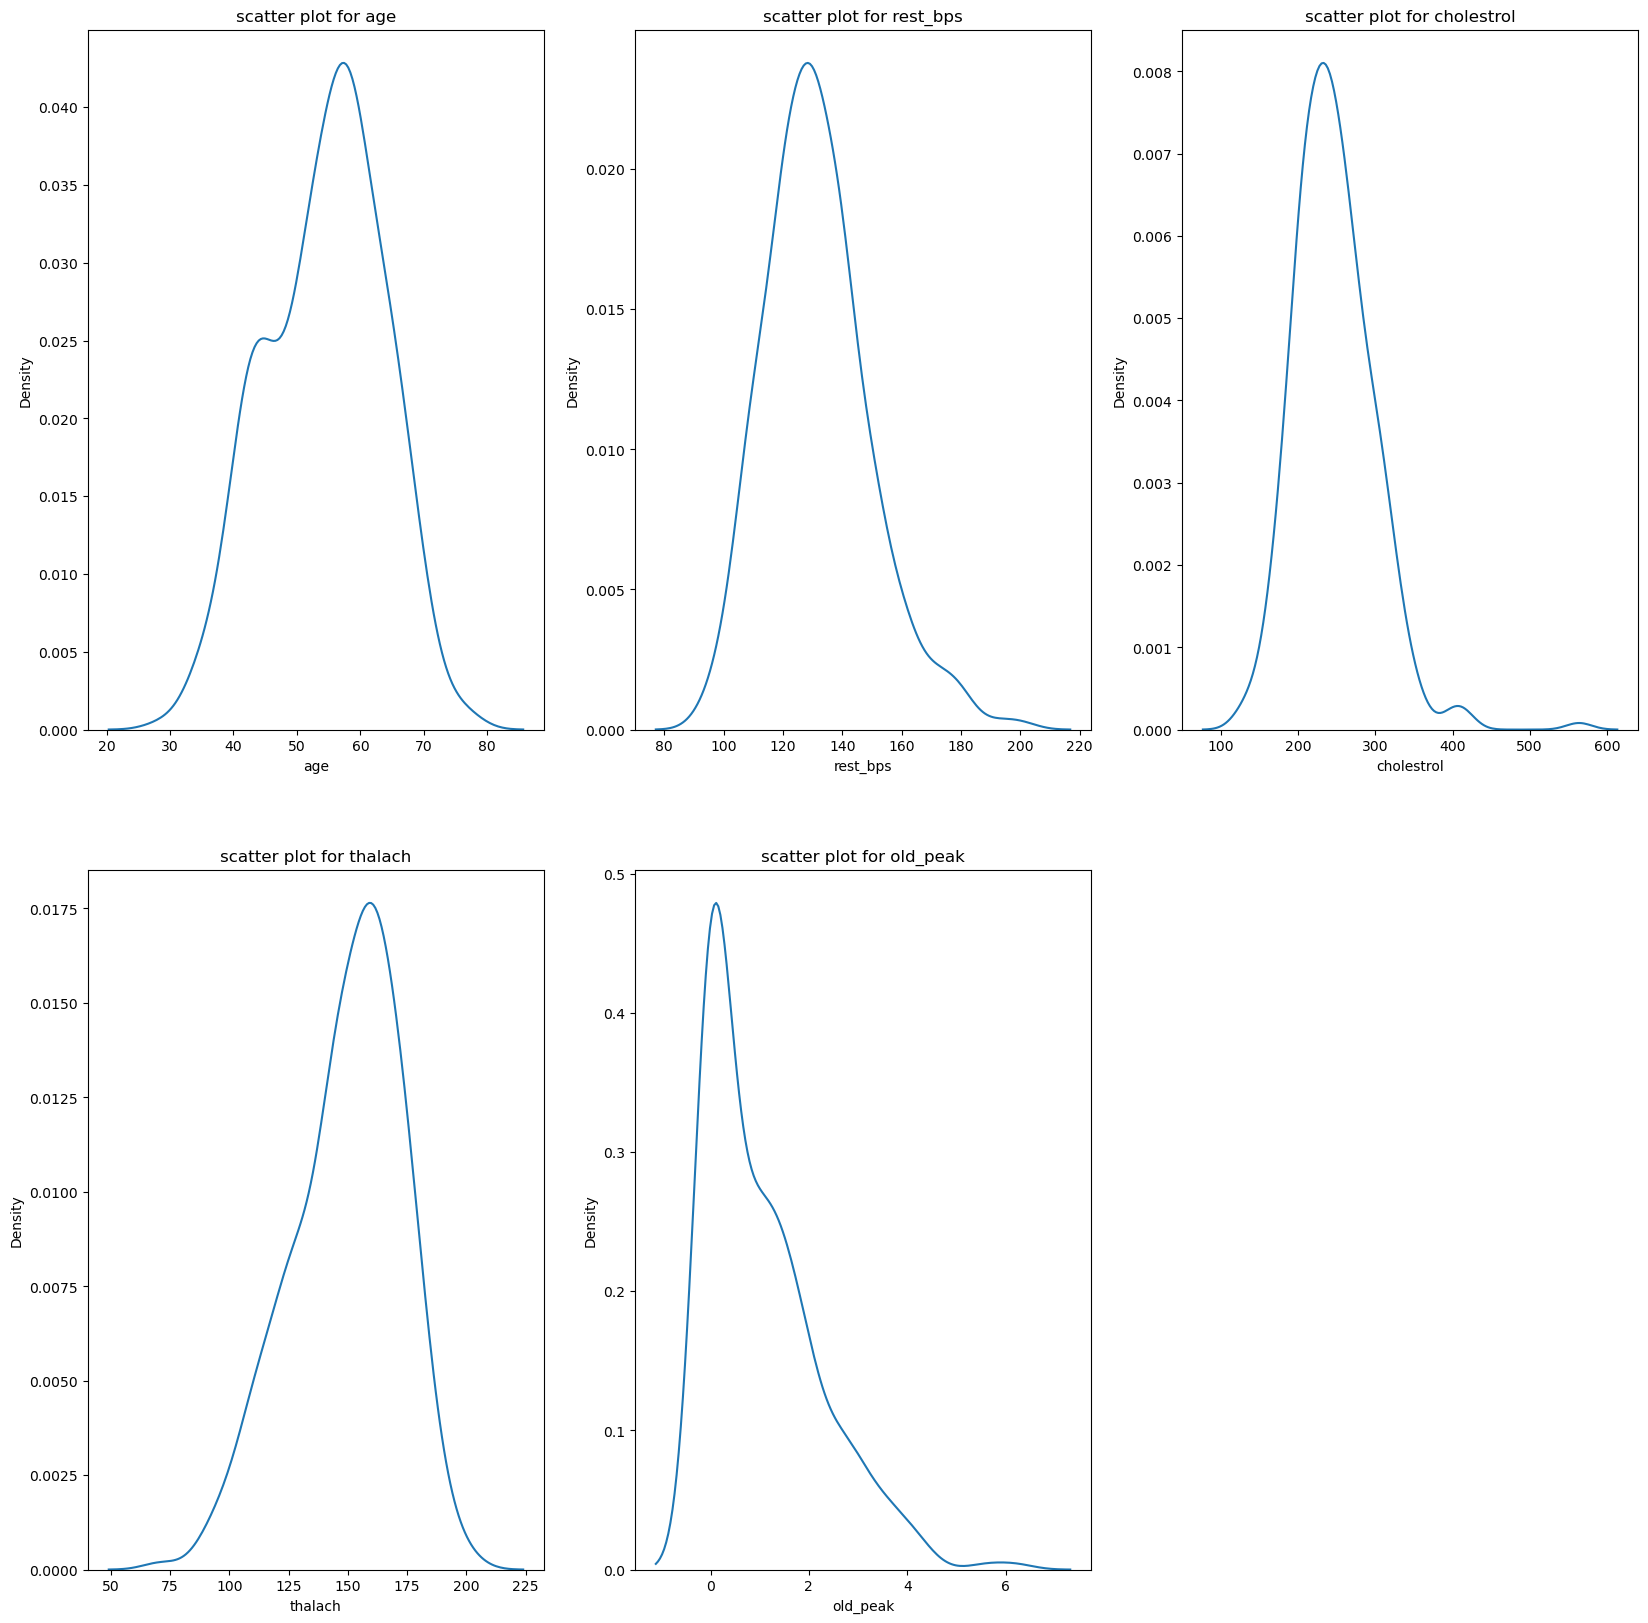

In [25]:
plt.figure(figsize=(20,20))
for i in range(0,len(cont_cols)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[cont_cols[i]])
    plt.title(f'scatter plot for {cont_cols[i]}')
    
plt.show()


C:\Users\win 8.1\AppData\Local\Temp\ipykernel_14692\3691044517.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


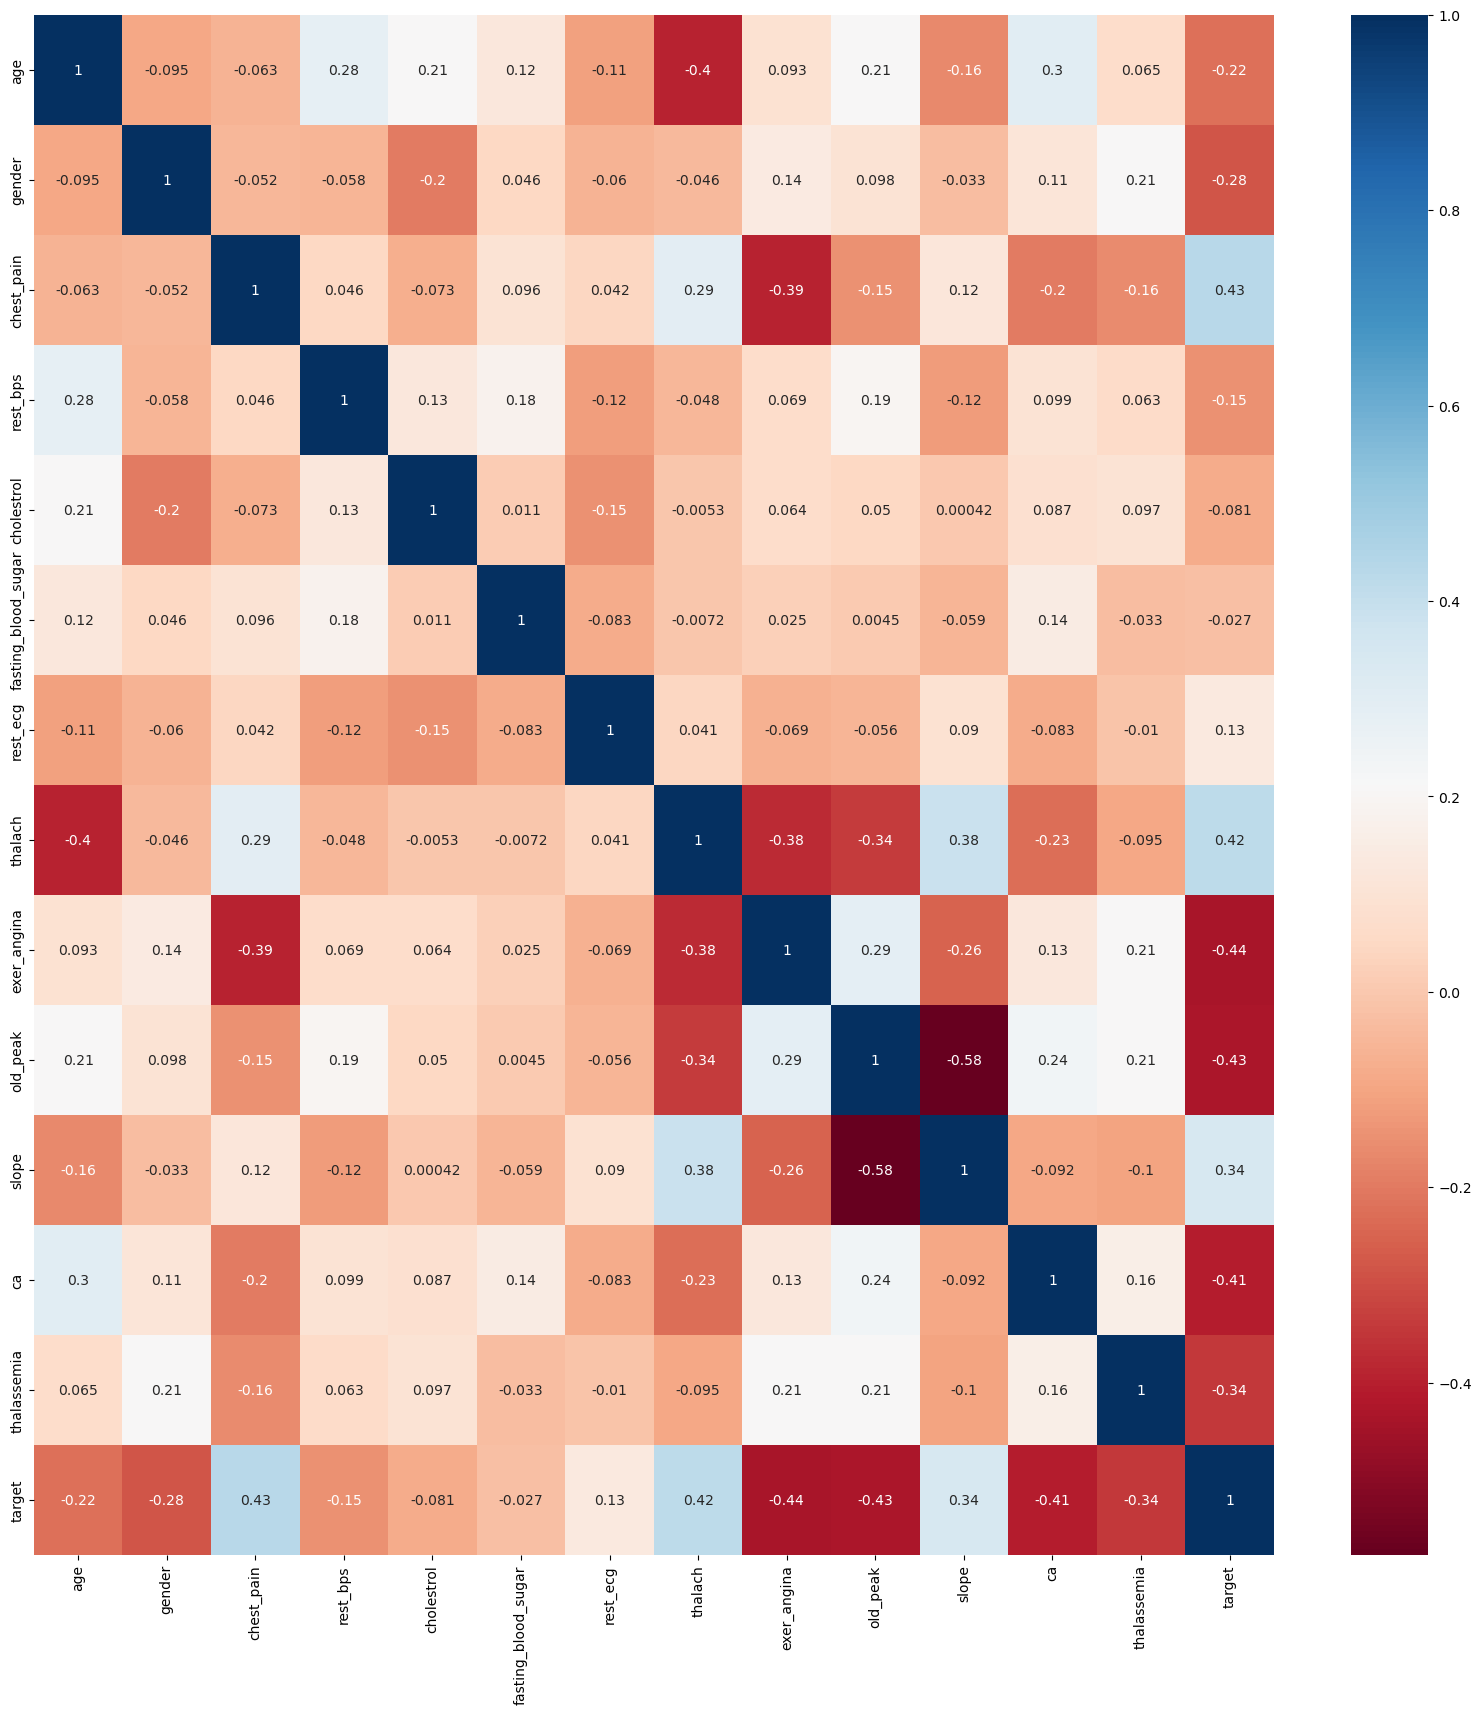

In [27]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
# plt.title(f'scatter plot for {cat_cols[i]}')
plt.show()


In [29]:
a=df.describe(percentiles=[0.01,0.02,0.05,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,5%,50%,98%,99%,max
age,29.0,35.00,35.04,40.00,55.5,70.00,71.00,77.0
gender,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0
chest_pain,0.0,0.00,0.00,0.00,1.0,3.00,3.00,3.0
rest_bps,94.0,100.00,101.02,108.00,130.0,177.92,180.00,200.0
cholestrol,126.0,149.00,160.08,175.05,240.5,353.98,406.87,564.0
fasting_blood_sugar,0.0,0.00,0.00,0.00,0.0,1.00,1.00,1.0
rest_ecg,0.0,0.00,0.00,0.00,1.0,1.00,1.99,2.0
thalach,71.0,95.01,97.04,108.05,152.5,186.98,191.98,202.0
exer_angina,0.0,0.00,0.00,0.00,0.0,1.00,1.00,1.0
old_peak,0.0,0.00,0.00,0.00,0.8,4.00,4.20,6.2


In [31]:
def outlier_treatment(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [33]:
df1=df.copy()

In [34]:
df[cont_cols]=df[cont_cols].apply(outlier_treatment)

In [36]:
x=df.drop(['target','Age_bins'],axis=1) #age bins model analysis keliye use kia tha 
y=df['target']
print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


# function to evaluate model

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score

In [51]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print('Confusion Matrix',cm)
    print('Classification report',cr)
    
def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model(ytest,ypred)
    train_acc=model.score(xtrain,ytrain)
    test_acc=model.score(xtest,ytest)
    pre1=precision_score(ytest,ypred)
    rec1=recall_score(ytest,ypred)
    res= pd.DataFrame({'Train Acc':train_acc,'Test acc':test_acc,'Pre1':pre1,'Rec1':rec1},index=[model_name])
    return res

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [52]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=25)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=25)

In [53]:
ypred_dt1=dt1.predict(x_test)
dt1_res= gen_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,['DT1(gini)'])
dt1_res

Confusion Matrix [[36  6]
 [11 38]]
Classification report               precision    recall  f1-score   support

           0       0.77      0.86      0.81        42
           1       0.86      0.78      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



,Train Acc,Test acc,Pre1,Rec1
DT1(gini),1.0,0.813187,0.863636,0.77551


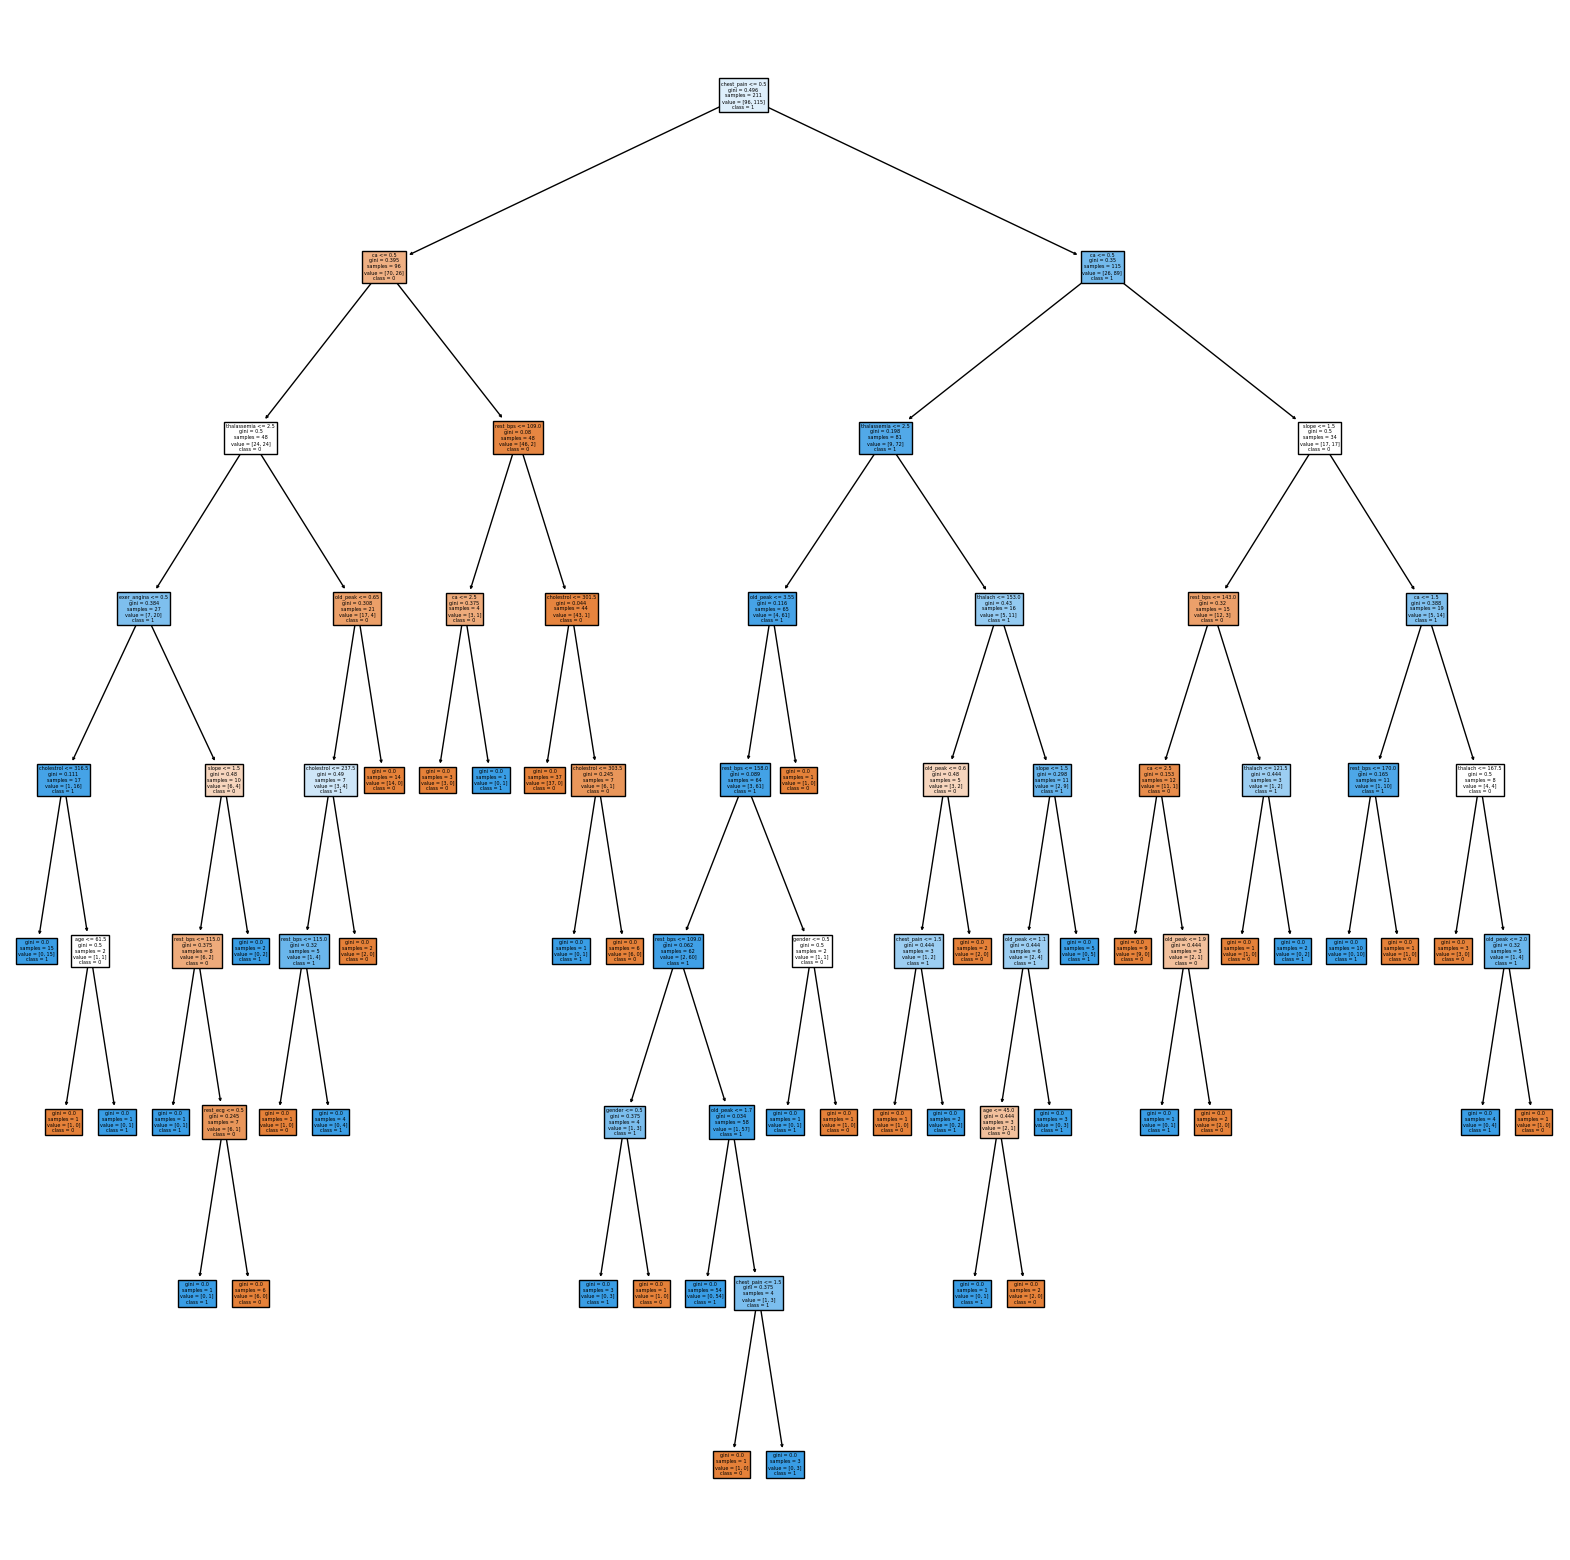

In [58]:
from sklearn.tree import plot_tree
cn=['0','1']
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

# model-2 dt2

In [76]:
dt2= DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=15,random_state=25)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=15, random_state=25)

In [77]:
ypred_dt2=dt2.predict(x_test)
dt2_res= gen_res(dt2,x_train,x_test,y_train,y_test,ypred_dt2,['DT2(gini,md=6,mss=15)'])
dt2_res

Confusion Matrix [[34  8]
 [16 33]]
Classification report               precision    recall  f1-score   support

           0       0.68      0.81      0.74        42
           1       0.80      0.67      0.73        49

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91



,Train Acc,Test acc,Pre1,Rec1
"DT2(gini,md=6,mss=15)",0.886256,0.736264,0.804878,0.673469


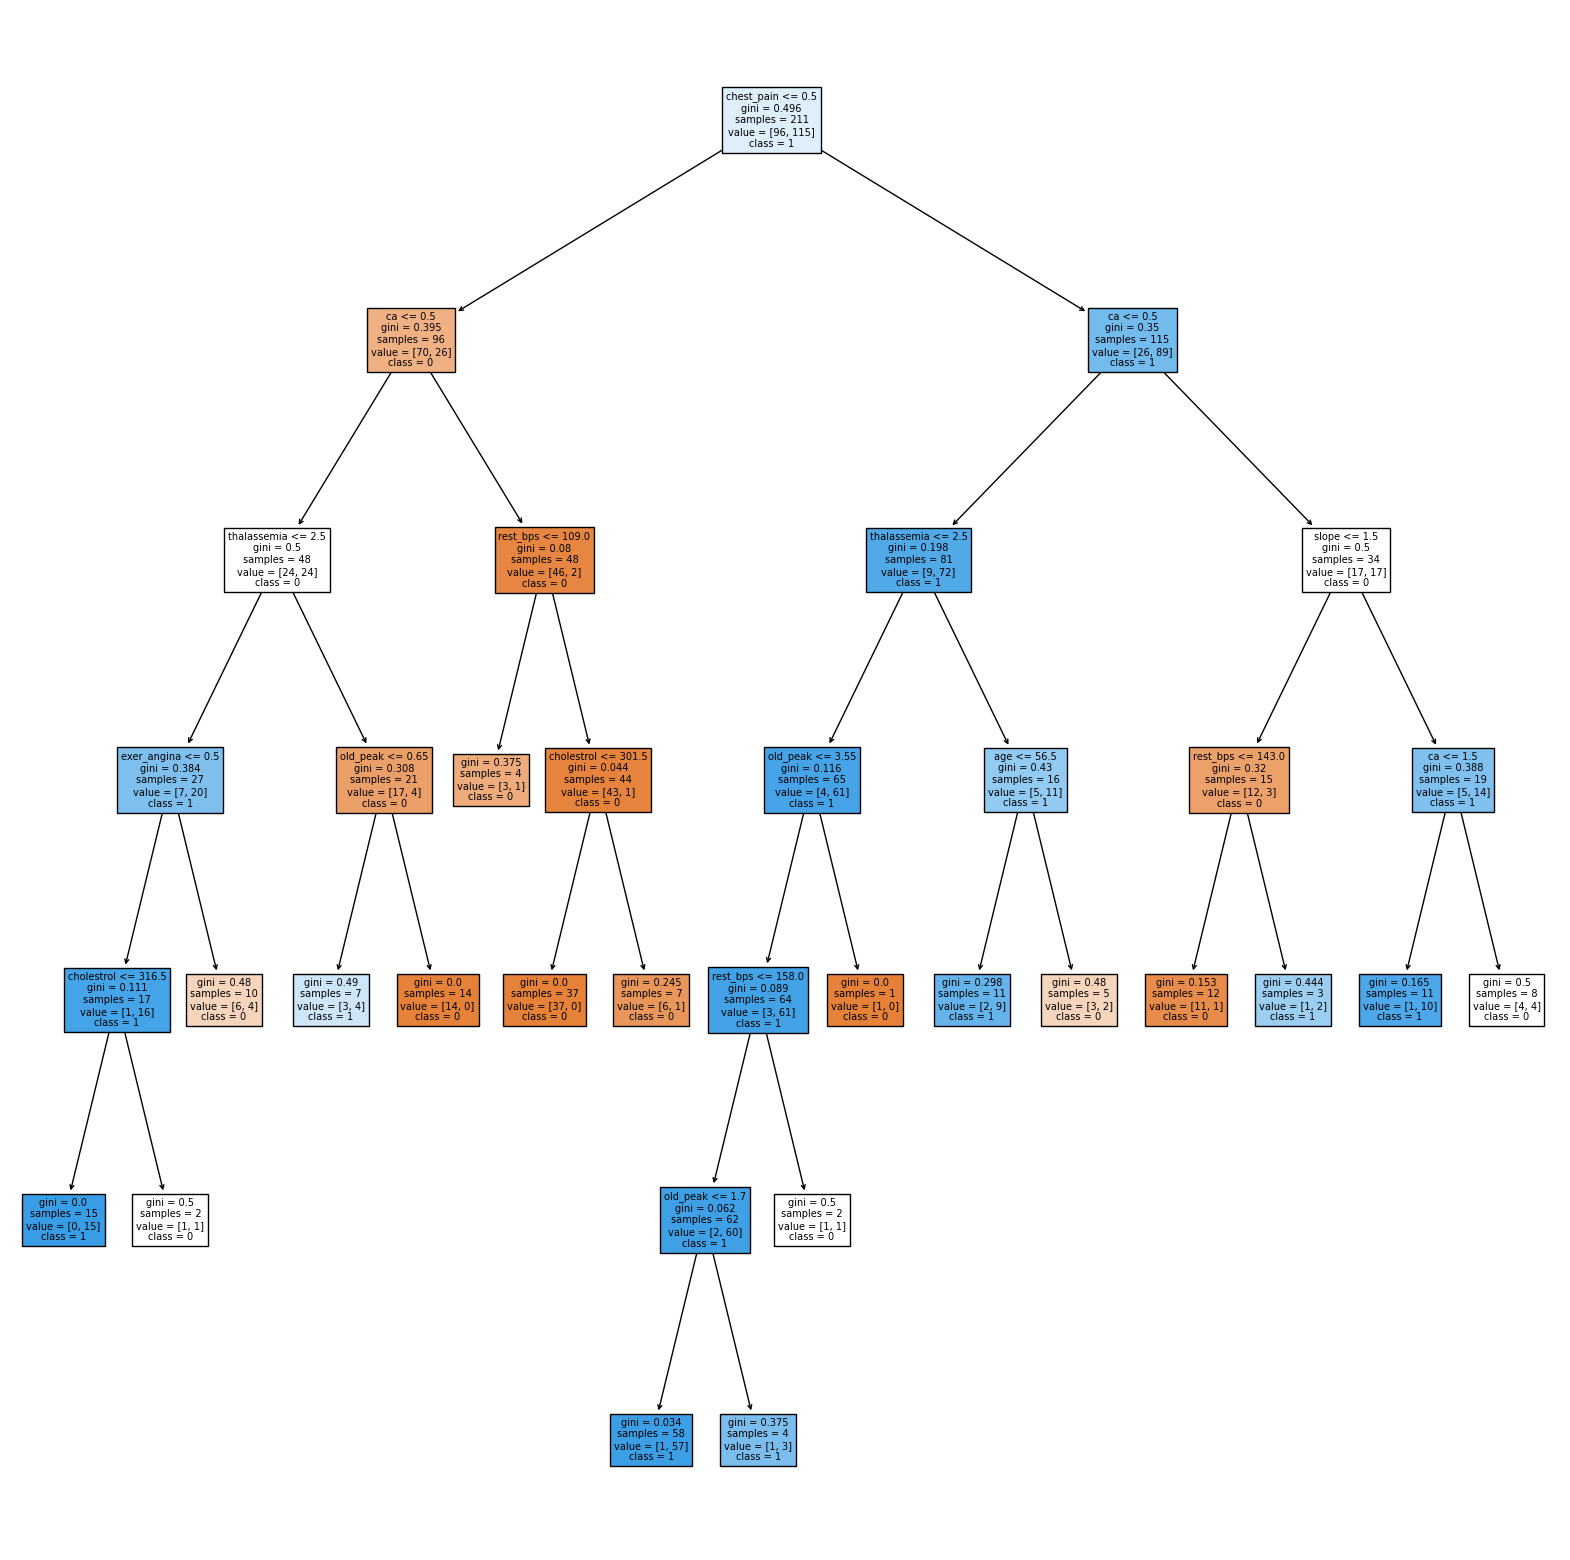

In [78]:
cn=['0','1']
plt.figure(figsize=(20,20))
plot_tree(dt2,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

# model 3 dt3

In [82]:
dt3= DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=20,random_state=25)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       random_state=25)

In [83]:
ypred_dt3=dt3.predict(x_test)
dt3_res= gen_res(dt3,x_train,x_test,y_train,y_test,ypred_dt3,['DT3(gini,md=6,mss=15)'])
dt3_res

Confusion Matrix [[36  6]
 [12 37]]
Classification report               precision    recall  f1-score   support

           0       0.75      0.86      0.80        42
           1       0.86      0.76      0.80        49

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91



,Train Acc,Test acc,Pre1,Rec1
"DT3(gini,md=6,mss=15)",0.890995,0.802198,0.860465,0.755102


In [ ]:
# hyperp

In [84]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [85]:
hparams={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8],'min_samples_split':[8,10,12,15,20]}

# GridSearchCV

In [87]:
dt_model=DecisionTreeClassifier(random_state=0)
gs1=GridSearchCV(dt_model,param_grid=hparams,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [88]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=0)
0.8009966777408637


In [90]:
#analysis :

In [89]:
gs1_res=pd.DataFrame(gs1.cv_results_)
gs1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008602,0.003326,0.004594,2.151105e-03,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.785714,0.714286,0.833333,0.785714,0.781949,0.038272,10
1,0.003593,0.000486,0.001999,3.814697e-07,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.690476,0.833333,0.785714,0.772425,0.047003,22
2,0.003598,0.000490,0.002203,4.089594e-04,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.690476,0.833333,0.785714,0.772425,0.047003,22
3,0.003398,0.000489,0.001999,6.217196e-07,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.690476,0.833333,0.761905,0.767663,0.046620,32
4,0.003403,0.000488,0.002798,1.597357e-03,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.767442,0.761905,0.690476,0.785714,0.761905,0.753488,0.032697,45


In [93]:
gs1_res.shape

(50, 16)

In [94]:
gs1_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [95]:
gs1_res=gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score','rank_test_score']]
gs1_res.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
0,gini,4,8,0.781949,10
1,gini,4,10,0.772425,22
2,gini,4,12,0.772425,22
3,gini,4,15,0.767663,32
4,gini,4,20,0.753488,45


# model 4: DT4 (based on GridSearchCV Results)

# randomisedsearchcv

In [96]:
dt_model=DecisionTreeClassifier(random_state=0)
rs1=RandomizedSearchCV(dt_model,param_distributions=hparams,scoring='accuracy',cv=5,n_iter=20)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 15,
                                                              20]},
                   scoring='accuracy')

In [97]:
print(rs1.best_params_)
print(rs1.best_estimator_)
print(rs1.best_score_)

{'min_samples_split': 12, 'max_depth': 5, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12,
                       random_state=0)
0.8009966777408637


In [99]:
rs1_res=pd.DataFrame(rs1.cv_results_)
print(rs1_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.015468      0.019472         0.005769        0.005555   
1        0.004801      0.000754         0.003799        0.001469   
2        0.006796      0.001460         0.004397        0.001500   
3        0.005396      0.000489         0.004398        0.002331   
4        0.008995      0.002277         0.004597        0.001854   
5        0.006396      0.001853         0.003598        0.001020   
6        0.005197      0.000399         0.003598        0.001200   
7        0.006197      0.001470         0.015991        0.025529   
8        0.009194      0.007134         0.003398        0.000800   
9        0.004399      0.000489         0.003597        0.000801   
10       0.005197      0.000980         0.002999        0.001095   
11       0.004796      0.000399         0.002998        0.000001   
12       0.005196      0.000747         0.002599        0.000490   
13       0.005397      0.000488         0.002798